# Nikita Pokharkar  2193161   LY IS 3   


# MNIST Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a 
large collection of handwritten digits. It has a training set of 60,000 examples, and a test 
set of 10,000 examples. It is a subset of a larger NIST Special Database 3 (digits written by 
employees of the United States Census Bureau) and Special Database 1 (digits written by high school students)
which contain monochrome images of handwritten digits. The digits have been size-normalized and centered in a 
fixed-size image. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

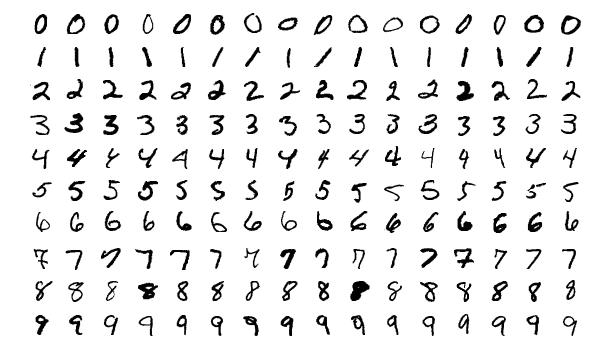

# Sequential Model
The Sequential model is a linear stack of layers. Activation Functions -The activation functions are the main mathematical logic functions of a neural layer. Each neural layer is having a separate activation function given by the programmer. They have divided into mainly two types, linear and non-linear functions.

In [1]:
from tensorflow.keras import Sequential
from keras.layers import Flatten, Dropout,Dense,Activation
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# Reshape data
X_train /= 255
X_test /= 255

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

In [9]:
from keras.utils import np_utils

In [10]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_train.shape

(60000, 10)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [12]:
model= Sequential()

In [13]:
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [16]:
model.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=2,validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 9s - loss: 0.2470 - accuracy: 0.9265 - val_loss: 0.1121 - val_accuracy: 0.9660 - 9s/epoch - 19ms/step
Epoch 2/20
469/469 - 7s - loss: 0.1011 - accuracy: 0.9686 - val_loss: 0.1010 - val_accuracy: 0.9700 - 7s/epoch - 15ms/step
Epoch 3/20
469/469 - 7s - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.0743 - val_accuracy: 0.9772 - 7s/epoch - 16ms/step
Epoch 4/20
469/469 - 8s - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0857 - val_accuracy: 0.9725 - 8s/epoch - 16ms/step
Epoch 5/20
469/469 - 8s - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0892 - val_accuracy: 0.9738 - 8s/epoch - 17ms/step
Epoch 6/20
469/469 - 9s - loss: 0.0384 - accuracy: 0.9868 - val_loss: 0.0663 - val_accuracy: 0.9802 - 9s/epoch - 19ms/step
Epoch 7/20
469/469 - 8s - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0636 - val_accuracy: 0.9824 - 8s/epoch - 16ms/step
Epoch 8/20
469/469 - 8s - loss: 0.0300 - accuracy: 0.9897 - val_loss: 0.0670 - val_accuracy: 0.9828 - 8s/epoch - 16ms/step
Epoch 9/20
469/4

In [17]:
from sklearn.metrics import classification_report

In [19]:
y_pred= model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [21]:
print(model.evaluate(X_train,Y_train))
print(model.evaluate(X_test,Y_test))

1875/1875 [==============================] - 18s 9ms/step - loss: 0.0048 - accuracy: 0.9981
[0.004780835006386042, 0.9981499910354614]
313/313 [==============================] - 2s 7ms/step - loss: 0.0788 - accuracy: 0.9835
[0.07882452011108398, 0.9835000038146973]


In [19]:
from keras.models import load_model 
model.save('MNIST.h5')

In [20]:
model = load_model('MNIST.h5')

# Final Output

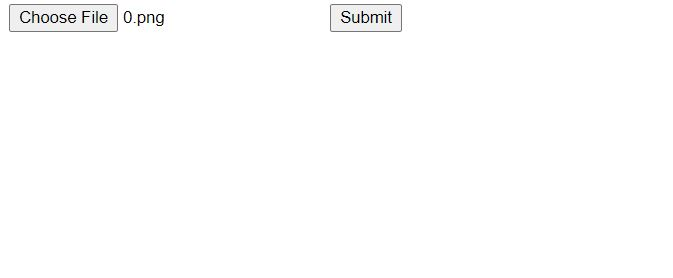

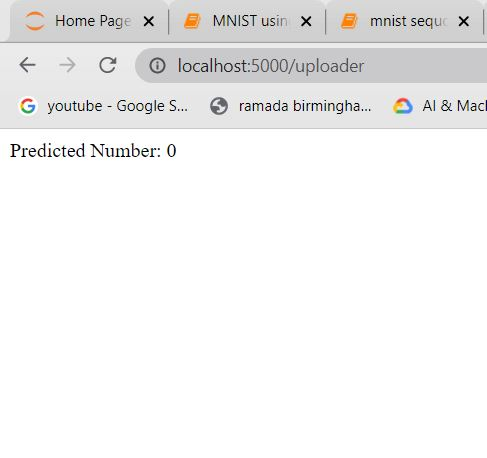